In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
train_data = data_converter.convert_my_table_to_df("Train")
test_data = data_converter.convert_my_table_to_df("Test")

Loaded table Train as dataframe
Loaded table Test as dataframe


In [ ]:
train_data.head(5)

,id,gender,ssc_pct,ssc_board,hsc_pct,hsc_board,hsc_stream,degree_pct,degree_type,work_exp,emptest_pct,stream,mba_pct,status
0,10001,Female,69.31,Central Board,73.31,Central Board,Commerce,65.10,Commerce & Mgmt,No,70.92,Finance,56.70,0
1,10002,Male,67.12,Central Board,85.11,State Board,Commerce,73.63,Commerce & Mgmt,No,87.40,Finance,60.76,0
2,10003,Male,80.46,Central Board,57.43,Central Board,Science,65.38,Science & Tech,Yes,70.78,Finance,61.90,0
3,10004,Female,72.00,State Board,60.00,State Board,Science,69.00,Commerce & Mgmt,No,55.50,HR,58.40,0
4,10005,Female,60.13,Central Board,58.83,State Board,Commerce,54.43,Commerce & Mgmt,No,52.93,HR,58.15,0


In [ ]:
test_data.head(5)

,id,gender,ssc_pct,ssc_board,hsc_pct,hsc_board,hsc_stream,degree_pct,degree_type,work_exp,emptest_pct,stream,mba_pct
0,20001,Female,65.16,Central Board,57.82,Central Board,Commerce,73.00,Commerce & Mgmt,No,57.16,HR,59.88
1,20002,Male,60.47,State Board,49.34,State Board,Science,55.33,Science & Tech,No,72.70,Finance,67.63
2,20003,Male,NaN,Central Board,55.47,Central Board,Commerce,50.46,Commerce & Mgmt,No,67.00,HR,62.84
3,20004,Male,78.44,State Board,49.02,State Board,Science,63.66,Science & Tech,Yes,64.00,Finance,72.82
4,20005,Male,80.66,Central Board,75.64,Central Board,Science,81.48,Science & Tech,Yes,77.39,HR,77.62


In [ ]:
def outlier_removal(data):
    data[data['ssc_pct'] >= 100].shape
    data.drop(data[data['hsc_pct'] >= 100].index, inplace = True) 
    data.drop(data[data['degree_pct'] >= 100].index, inplace = True) 
    data.drop(data[data['emptest_pct'] >= 100].index, inplace = True) 
    data.drop(data[data['mba_pct'] >= 100].index, inplace = True) 
    data.drop(data[data['ssc_pct'] >= 100].index, inplace = True) 
outlier_removal(train_data)
# outlier_removal(test_data)

In [ ]:
test_data_id = test_data['id']

In [ ]:
test_data_id.shape

(3000,)

In [ ]:
print("Train Data Shape :", train_data.shape, "\n Test Data Shape : ", test_data.shape)

Train Data Shape : (6859, 14) 
 Test Data Shape :  (3000, 13)


In [ ]:
def info_data(data):
    Null = pd.Series(data.isnull().sum())
    Unique_Count = pd.Series(data.describe(include='all').loc['unique', :])
    Data_type = pd.Series(data.dtypes)
    info_abt_data = pd.DataFrame(({"Null":Null, "Unique Count": Unique_Count, "Data type": Data_type}))
    return info_abt_data
def plot_missing_data(data):
    columns_with_null = data.columns[data.isna().sum() > 0]
    null_pct = (data[columns_with_null].isna().sum() / data.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');

,Null,Unique Count,Data type
id,0,NaN,int64
gender,0,2,object
ssc_pct,105,NaN,float64
ssc_board,142,2,object
hsc_pct,240,NaN,float64
hsc_board,116,2,object
hsc_stream,0,3,object
degree_pct,169,NaN,float64
degree_type,35,3,object
work_exp,309,2,object


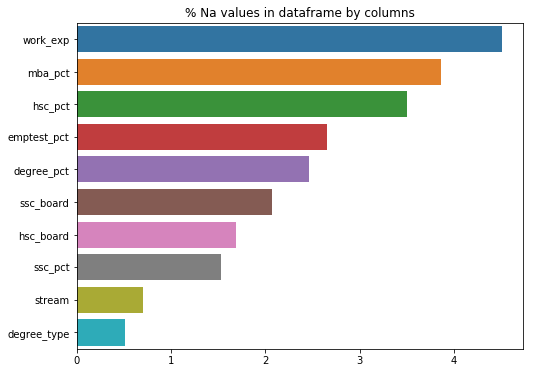

In [ ]:
info_data(train_data)
plot_missing_data(train_data)

,Null,Unique Count,Data type
id,0,NaN,int64
gender,0,2,object
ssc_pct,53,NaN,float64
ssc_board,68,2,object
hsc_pct,107,NaN,float64
hsc_board,54,2,object
hsc_stream,0,3,object
degree_pct,86,NaN,float64
degree_type,16,3,object
work_exp,123,2,object


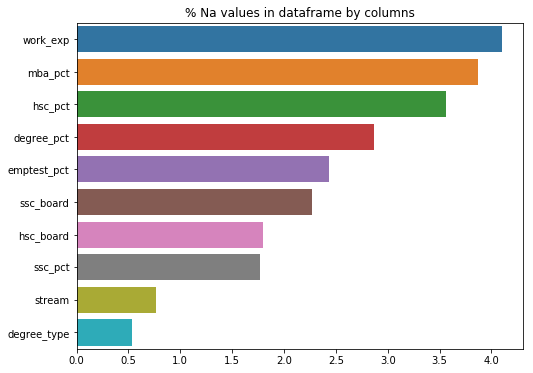

In [ ]:
info_data(test_data)
plot_missing_data(test_data)

<Figure size 720x432 with 0 Axes>

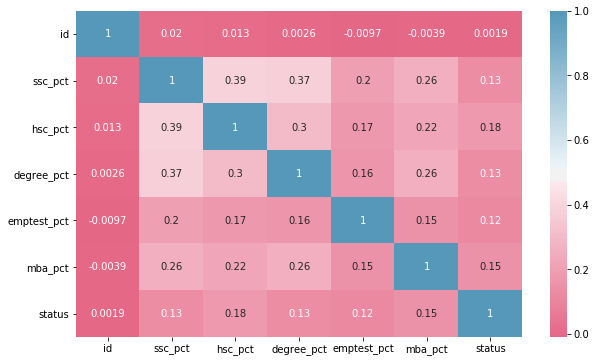

In [ ]:
#get correlations of each features in train dataset
corrmat = train_data.corr()
plt.figure(figsize=(10,6))
cmap = sns.diverging_palette(0, 230, 70, 60, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap)

<Figure size 720x432 with 0 Axes>

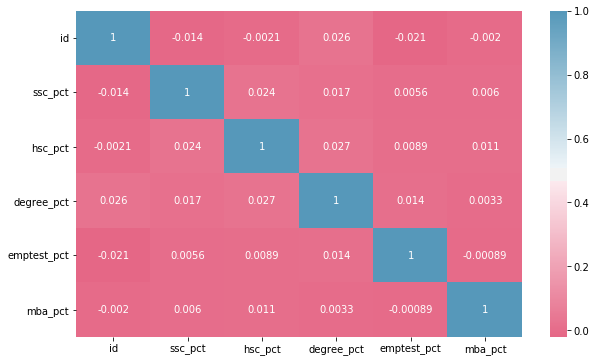

In [ ]:
#get correlations of each features in train dataset
corrmat = test_data.corr()
plt.figure(figsize=(10,6))
cmap = sns.diverging_palette(0, 230, 70, 60, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap)

In [ ]:
def data_map(data):
    data['gender_map'] = data.gender.map({'Female':0, 'Male':1})
    data['ssc_board_map'] = data.ssc_board.map({'State Board':0, 'Central Board':1})
    data['hsc_board_map'] = data.hsc_board.map({'State Board':1, 'Central Board':0})
    data['hsc_stream_map'] = data.hsc_stream.map({'Commerce':2, 'Science':1 , 'Arts':0})
    data['degree_type_map'] = data.degree_type.map({'Commerce & Mgmt':2, 'Science & Tech':1 , 'Other Degree': 0})
    data['work_exp_map'] = data.work_exp.map({'No':1, 'Yes':0})
    data['stream_map'] = data.stream.map({'Finance':1, 'HR':0})
    data.head()

In [ ]:
data_map(train_data)

In [ ]:
train_data.head()

,id,gender,ssc_pct,ssc_board,hsc_pct,hsc_board,hsc_stream,degree_pct,degree_type,work_exp,emptest_pct,stream,mba_pct,status,gender_map,ssc_board_map,hsc_board_map,hsc_stream_map,degree_type_map,work_exp_map,stream_map
0,10001,Female,69.31,Central Board,73.31,Central Board,Commerce,65.10,Commerce & Mgmt,No,70.92,Finance,56.70,0,0,1.0,0.0,2,2.0,1.0,1.0
1,10002,Male,67.12,Central Board,85.11,State Board,Commerce,73.63,Commerce & Mgmt,No,87.40,Finance,60.76,0,1,1.0,1.0,2,2.0,1.0,1.0
2,10003,Male,80.46,Central Board,57.43,Central Board,Science,65.38,Science & Tech,Yes,70.78,Finance,61.90,0,1,1.0,0.0,1,1.0,0.0,1.0
3,10004,Female,72.00,State Board,60.00,State Board,Science,69.00,Commerce & Mgmt,No,55.50,HR,58.40,0,0,0.0,1.0,1,2.0,1.0,0.0
4,10005,Female,60.13,Central Board,58.83,State Board,Commerce,54.43,Commerce & Mgmt,No,52.93,HR,58.15,0,0,1.0,1.0,2,2.0,1.0,0.0


In [ ]:
data_map(test_data)

In [ ]:
train_data.head()

,id,gender,ssc_pct,ssc_board,hsc_pct,hsc_board,hsc_stream,degree_pct,degree_type,work_exp,emptest_pct,stream,mba_pct,status,gender_map,ssc_board_map,hsc_board_map,hsc_stream_map,degree_type_map,work_exp_map,stream_map
0,10001,Female,69.31,Central Board,73.31,Central Board,Commerce,65.10,Commerce & Mgmt,No,70.92,Finance,56.70,0,0,1.0,0.0,2,2.0,1.0,1.0
1,10002,Male,67.12,Central Board,85.11,State Board,Commerce,73.63,Commerce & Mgmt,No,87.40,Finance,60.76,0,1,1.0,1.0,2,2.0,1.0,1.0
2,10003,Male,80.46,Central Board,57.43,Central Board,Science,65.38,Science & Tech,Yes,70.78,Finance,61.90,0,1,1.0,0.0,1,1.0,0.0,1.0
3,10004,Female,72.00,State Board,60.00,State Board,Science,69.00,Commerce & Mgmt,No,55.50,HR,58.40,0,0,0.0,1.0,1,2.0,1.0,0.0
4,10005,Female,60.13,Central Board,58.83,State Board,Commerce,54.43,Commerce & Mgmt,No,52.93,HR,58.15,0,0,1.0,1.0,2,2.0,1.0,0.0


In [ ]:
info_data(train_data)

,Null,Unique Count,Data type
id,0,NaN,int64
gender,0,2,object
ssc_pct,105,NaN,float64
ssc_board,142,2,object
hsc_pct,240,NaN,float64
hsc_board,116,2,object
hsc_stream,0,3,object
degree_pct,169,NaN,float64
degree_type,35,3,object
work_exp,309,2,object


In [ ]:
info_data(test_data)

,Null,Unique Count,Data type
id,0,NaN,int64
gender,0,2,object
ssc_pct,53,NaN,float64
ssc_board,68,2,object
hsc_pct,107,NaN,float64
hsc_board,54,2,object
hsc_stream,0,3,object
degree_pct,86,NaN,float64
degree_type,16,3,object
work_exp,123,2,object


In [ ]:
train_data = train_data[['gender_map', 'ssc_pct','ssc_board_map', 'hsc_pct', 'hsc_board_map', 'hsc_stream_map', 'degree_pct', 'degree_type_map', 'work_exp_map', 'emptest_pct','stream_map','mba_pct','status']]
test_data = test_data[['gender_map', 'ssc_pct','ssc_board_map', 'hsc_pct', 'hsc_board_map', 'hsc_stream_map', 'degree_pct', 'degree_type_map', 'work_exp_map', 'emptest_pct','stream_map','mba_pct']]

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_train = pd.DataFrame(scaler.fit_transform(train_data), columns = train_data.columns)
# df_train.head()

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df_test = pd.DataFrame(scaler.fit_transform(test_data), columns = test_data.columns)
# df_test.head()

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_train = pd.DataFrame(imputer.fit_transform(train_data),columns = train_data.columns)
df_test = pd.DataFrame(imputer.fit_transform(test_data),columns = test_data.columns)

In [ ]:
df_train.head()

,gender_map,ssc_pct,ssc_board_map,hsc_pct,hsc_board_map,hsc_stream_map,degree_pct,degree_type_map,work_exp_map,emptest_pct,stream_map,mba_pct,status
0,0.0,69.31,1.0,73.31,0.0,2.0,65.10,2.0,1.0,70.92,1.0,56.70,0.0
1,1.0,67.12,1.0,85.11,1.0,2.0,73.63,2.0,1.0,87.40,1.0,60.76,0.0
2,1.0,80.46,1.0,57.43,0.0,1.0,65.38,1.0,0.0,70.78,1.0,61.90,0.0
3,0.0,72.00,0.0,60.00,1.0,1.0,69.00,2.0,1.0,55.50,0.0,58.40,0.0
4,0.0,60.13,1.0,58.83,1.0,2.0,54.43,2.0,1.0,52.93,0.0,58.15,0.0


In [ ]:
df_test.head()

,gender_map,ssc_pct,ssc_board_map,hsc_pct,hsc_board_map,hsc_stream_map,degree_pct,degree_type_map,work_exp_map,emptest_pct,stream_map,mba_pct
0,0.0,65.160,1.0,57.82,0.0,2.0,73.00,2.0,1.0,57.16,0.0,59.88
1,1.0,60.470,0.0,49.34,1.0,1.0,55.33,1.0,1.0,72.70,1.0,67.63
2,1.0,51.802,1.0,55.47,0.0,2.0,50.46,2.0,1.0,67.00,0.0,62.84
3,1.0,78.440,0.0,49.02,1.0,1.0,63.66,1.0,0.0,64.00,1.0,72.82
4,1.0,80.660,1.0,75.64,0.0,1.0,81.48,1.0,0.0,77.39,0.0,77.62


In [ ]:
df_train.isnull().sum()

gender_map         0
ssc_pct            0
ssc_board_map      0
hsc_pct            0
hsc_board_map      0
hsc_stream_map     0
degree_pct         0
degree_type_map    0
work_exp_map       0
emptest_pct        0
stream_map         0
mba_pct            0
status             0
dtype: int64

In [ ]:
df_test.isnull().sum()

gender_map         0
ssc_pct            0
ssc_board_map      0
hsc_pct            0
hsc_board_map      0
hsc_stream_map     0
degree_pct         0
degree_type_map    0
work_exp_map       0
emptest_pct        0
stream_map         0
mba_pct            0
dtype: int64

<Figure size 720x432 with 0 Axes>

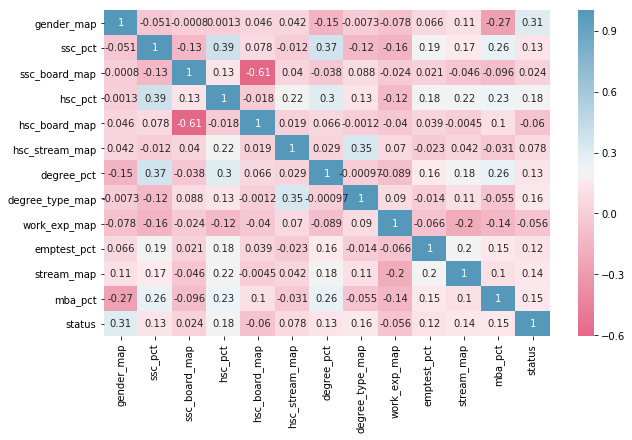

In [ ]:
#get correlations of each features in dataset
corrmat = df_train.corr()
plt.figure(figsize=(10,6))
cmap = sns.diverging_palette(0, 230, 70, 60, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap)

<Figure size 720x432 with 0 Axes>

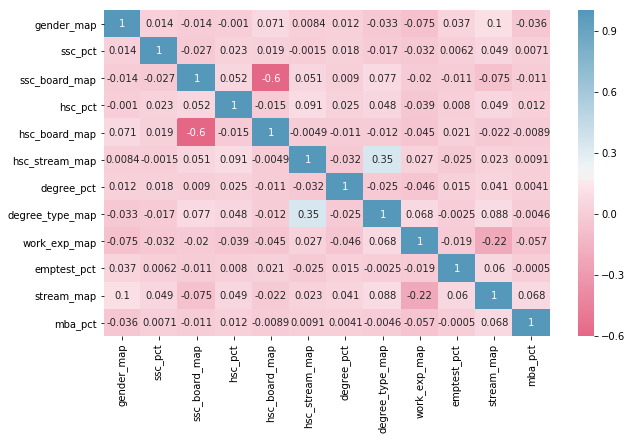

In [ ]:
#get correlations of each features in dataset
corrmat = df_test.corr()
plt.figure(figsize=(10,6))
cmap = sns.diverging_palette(0, 230, 70, 60, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=cmap)

In [ ]:
# def outlier_removal(data):
#     data[data['ssc_pct'] >= 100].shape
#     data.drop(data[data['hsc_pct'] >= 100].index, inplace = True) 
#     data.drop(data[data['degree_pct'] >= 100].index, inplace = True) 
#     data.drop(data[data['emptest_pct'] >= 100].index, inplace = True) 
#     data.drop(data[data['mba_pct'] >= 100].index, inplace = True) 
#     data.drop(data[data['ssc_pct'] >= 100].index, inplace = True) 
# outlier_removal(df_train)
# outlier_removal(df_test)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6859 entries, 0 to 6858
Data columns (total 13 columns):
gender_map         6859 non-null float64
ssc_pct            6859 non-null float64
ssc_board_map      6859 non-null float64
hsc_pct            6859 non-null float64
hsc_board_map      6859 non-null float64
hsc_stream_map     6859 non-null float64
degree_pct         6859 non-null float64
degree_type_map    6859 non-null float64
work_exp_map       6859 non-null float64
emptest_pct        6859 non-null float64
stream_map         6859 non-null float64
mba_pct            6859 non-null float64
status             6859 non-null float64
dtypes: float64(13)
memory usage: 696.7 KB


In [ ]:
df_train.head(2)

,gender_map,ssc_pct,ssc_board_map,hsc_pct,hsc_board_map,hsc_stream_map,degree_pct,degree_type_map,work_exp_map,emptest_pct,stream_map,mba_pct,status
0,0.0,69.31,1.0,73.31,0.0,2.0,65.10,2.0,1.0,70.92,1.0,56.70,0.0
1,1.0,67.12,1.0,85.11,1.0,2.0,73.63,2.0,1.0,87.40,1.0,60.76,0.0


In [ ]:
df_train = df_train.astype(int)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6859 entries, 0 to 6858
Data columns (total 13 columns):
gender_map         6859 non-null int64
ssc_pct            6859 non-null int64
ssc_board_map      6859 non-null int64
hsc_pct            6859 non-null int64
hsc_board_map      6859 non-null int64
hsc_stream_map     6859 non-null int64
degree_pct         6859 non-null int64
degree_type_map    6859 non-null int64
work_exp_map       6859 non-null int64
emptest_pct        6859 non-null int64
stream_map         6859 non-null int64
mba_pct            6859 non-null int64
status             6859 non-null int64
dtypes: int64(13)
memory usage: 696.7 KB


In [ ]:
df_test = df_test.astype(int)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
gender_map         3000 non-null int64
ssc_pct            3000 non-null int64
ssc_board_map      3000 non-null int64
hsc_pct            3000 non-null int64
hsc_board_map      3000 non-null int64
hsc_stream_map     3000 non-null int64
degree_pct         3000 non-null int64
degree_type_map    3000 non-null int64
work_exp_map       3000 non-null int64
emptest_pct        3000 non-null int64
stream_map         3000 non-null int64
mba_pct            3000 non-null int64
dtypes: int64(12)
memory usage: 281.3 KB


In [ ]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
gender_map,6859.0,0.645867,0.478285,0.0,0.0,1.0,1.0,1.0
ssc_pct,6859.0,66.576323,12.132500,3.0,59.0,67.0,75.0,89.0
ssc_board_map,6859.0,0.549934,0.497537,0.0,0.0,1.0,1.0,1.0
hsc_pct,6859.0,65.887593,12.111976,3.0,59.0,65.0,73.0,97.0
hsc_board_map,6859.0,0.601254,0.489676,0.0,0.0,1.0,1.0,1.0
hsc_stream_map,6859.0,1.337075,0.677373,0.0,1.0,1.0,2.0,2.0
degree_pct,6859.0,65.573553,8.975385,4.0,60.0,65.0,72.0,91.0
degree_type_map,6859.0,1.649366,0.537826,0.0,1.0,2.0,2.0,2.0
work_exp_map,6859.0,0.647470,0.477793,0.0,0.0,1.0,1.0,1.0
emptest_pct,6859.0,71.447587,14.301527,4.0,60.0,70.0,83.0,98.0


In [ ]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
gender_map,3000.0,0.637667,0.480755,0.0,0.0,1.0,1.0,1.0
ssc_pct,3000.0,70.059333,53.900293,3.0,59.0,66.0,75.0,1171.0
ssc_board_map,3000.0,0.523333,0.499539,0.0,0.0,1.0,1.0,1.0
hsc_pct,3000.0,67.186000,38.797257,3.0,59.0,64.0,73.0,1152.0
hsc_board_map,3000.0,0.610333,0.487756,0.0,0.0,1.0,1.0,1.0
hsc_stream_map,3000.0,1.349667,0.666994,0.0,1.0,1.0,2.0,2.0
degree_pct,3000.0,69.124000,49.902158,4.0,60.0,65.0,72.0,1010.0
degree_type_map,3000.0,1.656333,0.542517,0.0,1.0,2.0,2.0,2.0
work_exp_map,3000.0,0.662667,0.472879,0.0,0.0,1.0,1.0,1.0
emptest_pct,3000.0,75.080333,55.441300,3.0,60.0,70.0,83.0,1131.0


In [ ]:
x_train = df_train[['gender_map', 'ssc_pct','ssc_board_map', 'hsc_pct', 'hsc_board_map', 'hsc_stream_map', 'degree_pct', 'degree_type_map', 'work_exp_map', 'emptest_pct','stream_map','mba_pct']]
y_train = df_train['status']

In [ ]:
x_test = df_test[['gender_map', 'ssc_pct','ssc_board_map', 'hsc_pct', 'hsc_board_map', 'hsc_stream_map', 'degree_pct', 'degree_type_map', 'work_exp_map', 'emptest_pct','stream_map','mba_pct']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# 

In [ ]:
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
# y_pred.shape
y_pred.shape

(3000,)

In [ ]:
test_data_id.shape

(3000,)

In [ ]:
my_python_df = pd.DataFrame({ "id": test_data_id, "rfc_v3_Status": y_pred})

In [ ]:
my_python_df.head(10)

,id,rfc_v3_Status
0,20001,0
1,20002,0
2,20003,0
3,20004,0
4,20005,1
5,20006,0
6,20007,1
7,20008,0
8,20009,0
9,20010,0


In [ ]:
data_converter.convert_df_to_my_table(my_python_df)

'Successfully added dataframe as a new table. Move to point & click to view the file.'

In [ ]:
%ath_table

# Lists the details of the tables (datasets) available in the point & click view
# Use '%ath_table -a <table_name> -l <python_dataframe_name>' to load the table to a Python dataframe.
# Alternatively, python_dataframe_name = data_converter.convert_my_table_to_df('<table_name>') can also be used to load the table to a Python dataframe.
